In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('la liga.csv',dtype={'team':'str','Win League':'str'})
df.head()

,team,Win League
0,Alavés,"[1, 1]"
1,Athletic Bilbao,"[1, 1]"
2,Atlético Madrid,"[12, 17]"
3,Barcelona,"[44, 43]"
4,Celta Vigo,"[1, 1]"


In [3]:
from ast import literal_eval
df['Win League'] = df['Win League'].apply(literal_eval)

In [4]:
# get the latest prob value
array_length  = len(list(df.iloc[0]['Win League'])) #len of all lists should be same
def get_latest_prob(row):
    row['latest_prob'] = int(row['Win League'][array_length -1])
    return row

df = df.apply(get_latest_prob,axis=1)
df =df.sort_values(by=['latest_prob'],ascending = False)[:5].copy()
#display(df)

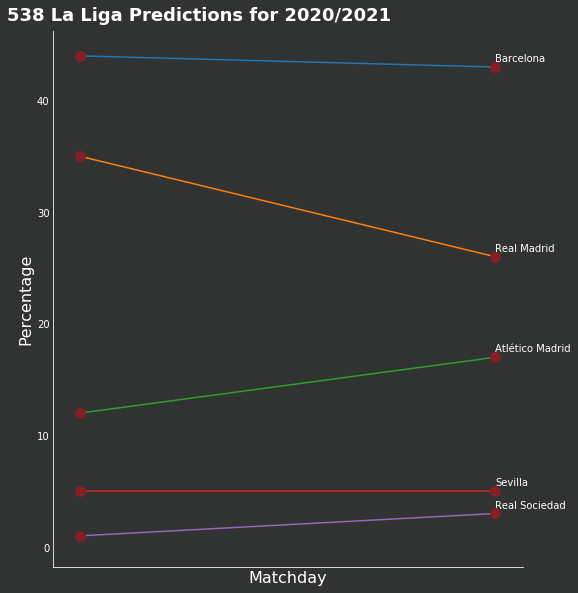

In [23]:
""" Most of the code is taken from 
https://github.com/petermckeeverPerform/friends-of-tracking-viz-lecture/blob/master/notebooks/lecture-notebook.ipynb"""
title_font = "DejaVu Sans"
body_font = "Open Sans"
text_color = "w"
background = "#313332"
filler = "grey"
primary = "red"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
array_length  = len(list(df.iloc[0]['Win League'])) #len of all lists should be same
matchday = np.asarray(list(range(1, array_length +1)))

fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)
spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

#this will hide the x-axis values
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])

ax.set_xlabel("Matchday", fontfamily=title_font, fontweight="regular", fontsize=16, color=text_color)
ax.set_ylabel("Percentage", fontfamily=title_font, fontweight="regular", fontsize= 16, color=text_color)

ax.tick_params(axis="both",length=0)
for i in range(len(df)):
    x = np.asarray(list(df.iloc[i]['Win League']))
    plt.annotate(df.iloc[i]['team'],(matchday[-1],np.asarray(list(df.iloc[i]['Win League']))[array_length -1]+0.5),color=text_color)
    plt.plot(matchday,x)
    ax.scatter(matchday,x,s=120,color='#841F27',edgecolors='#841F27', alpha=1, lw=0.25, zorder=4)
fig.text(0,1,"538 La Liga Predictions for 2020/2021",fontweight="bold", fontsize=18,fontfamily=title_font, color=text_color)
plt.tight_layout()
plt.show()    
ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)